In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob

In [3]:
#First listing down all the columns

In [4]:
df = pd.read_parquet('Combined_Flights_2018.parquet')

In [5]:
df.columns.tolist()

['FlightDate',
 'Airline',
 'Origin',
 'Dest',
 'Cancelled',
 'Diverted',
 'CRSDepTime',
 'DepTime',
 'DepDelayMinutes',
 'DepDelay',
 'ArrTime',
 'ArrDelayMinutes',
 'AirTime',
 'CRSElapsedTime',
 'ActualElapsedTime',
 'Distance',
 'Year',
 'Quarter',
 'Month',
 'DayofMonth',
 'DayOfWeek',
 'Marketing_Airline_Network',
 'Operated_or_Branded_Code_Share_Partners',
 'DOT_ID_Marketing_Airline',
 'IATA_Code_Marketing_Airline',
 'Flight_Number_Marketing_Airline',
 'Operating_Airline',
 'DOT_ID_Operating_Airline',
 'IATA_Code_Operating_Airline',
 'Tail_Number',
 'Flight_Number_Operating_Airline',
 'OriginAirportID',
 'OriginAirportSeqID',
 'OriginCityMarketID',
 'OriginCityName',
 'OriginState',
 'OriginStateFips',
 'OriginStateName',
 'OriginWac',
 'DestAirportID',
 'DestAirportSeqID',
 'DestCityMarketID',
 'DestCityName',
 'DestState',
 'DestStateFips',
 'DestStateName',
 'DestWac',
 'DepDel15',
 'DepartureDelayGroups',
 'DepTimeBlk',
 'TaxiOut',
 'WheelsOff',
 'WheelsOn',
 'TaxiIn',
 'CRS

In [6]:
parquet_files = glob.glob('Combined_Flights_*.parquet')

In [7]:
print(parquet_files)

['Combined_Flights_2018.parquet', 'Combined_Flights_2019.parquet', 'Combined_Flights_2020.parquet', 'Combined_Flights_2021.parquet', 'Combined_Flights_2022.parquet']


In [8]:
relevant_columns = [
    'FlightDate', 'Airline', 'Origin', 'Dest', 'Cancelled', 'Diverted', 
    'CRSDepTime', 'DepTime', 'DepDelayMinutes', 'DepDelay', 'DepDel15',
    'ArrTime', 'ArrDelayMinutes', 'ArrDelay', 'ArrDel15', 'AirTime', 
    'CRSElapsedTime', 'ActualElapsedTime', 'Distance', 'Year', 'Quarter', 
    'Month', 'DayofMonth', 'DayOfWeek', 'DepTimeBlk', 'ArrTimeBlk', 
    'TaxiOut', 'TaxiIn'
]

In [9]:
dfs = []
for f in parquet_files:
    dfs.append(pd.read_parquet(f, columns=relevant_columns))
df = pd.concat(dfs).reset_index(drop=True)

In [10]:
df.head()

,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,...,Distance,Year,Quarter,Month,DayofMonth,DayOfWeek,DepTimeBlk,ArrTimeBlk,TaxiOut,TaxiIn
0,2018-01-23,Endeavor Air Inc.,ABY,ATL,False,False,1202,1157.0,0.0,-5.0,...,145.0,2018,1,1,23,2,1200-1259,1300-1359,14.0,7.0
1,2018-01-24,Endeavor Air Inc.,ABY,ATL,False,False,1202,1157.0,0.0,-5.0,...,145.0,2018,1,1,24,3,1200-1259,1300-1359,13.0,12.0
2,2018-01-25,Endeavor Air Inc.,ABY,ATL,False,False,1202,1153.0,0.0,-9.0,...,145.0,2018,1,1,25,4,1200-1259,1300-1359,18.0,11.0
3,2018-01-26,Endeavor Air Inc.,ABY,ATL,False,False,1202,1150.0,0.0,-12.0,...,145.0,2018,1,1,26,5,1200-1259,1300-1359,17.0,11.0
4,2018-01-27,Endeavor Air Inc.,ABY,ATL,False,False,1400,1355.0,0.0,-5.0,...,145.0,2018,1,1,27,6,1400-1459,1500-1559,17.0,11.0


In [11]:
cat_col = ['Airline','Origin','Dest','DepTimeBlk','ArrTimeBlk']
for c in cat_col:
    df[c] = df[c].astype("category")

float_col = ['DepDelayMinutes','ArrDelayMinutes','AirTime','CRSElapsedTime','ActualElapsedTime','Distance','TaxiOut','TaxiIn','DepTime','DepDelay',
             'DepDel15','ArrTime','ArrDelay','ArrDel15']
for c in float_col:
    df[c] = df[c].astype("float16")

int_col = ['Month','DayOfWeek','CRSDepTime','DayofMonth','Year','Quarter']
for c in int_col:
    df[c] = df[c].astype("int16")

df['DepDel15'] = df['DepDel15'].astype("bool")
df['ArrDel15'] = df['ArrDel15'].astype("bool")

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29193782 entries, 0 to 29193781
Data columns (total 28 columns):
 #   Column             Dtype         
---  ------             -----         
 0   FlightDate         datetime64[us]
 1   Airline            category      
 2   Origin             category      
 3   Dest               category      
 4   Cancelled          bool          
 5   Diverted           bool          
 6   CRSDepTime         int16         
 7   DepTime            float16       
 8   DepDelayMinutes    float16       
 9   DepDelay           float16       
 10  DepDel15           bool          
 11  ArrTime            float16       
 12  ArrDelayMinutes    float16       
 13  ArrDelay           float16       
 14  ArrDel15           bool          
 15  AirTime            float16       
 16  CRSElapsedTime     float16       
 17  ActualElapsedTime  float16       
 18  Distance           float16       
 19  Year               int16         
 20  Quarter            int

## Missing Values

In [14]:
missing_data = df.isnull().sum()
missing_percentage = (df.isnull().sum()/len(df)) * 100
missing_summary = pd.DataFrame({'Missing Values': missing_data, 'Missing Percentage': missing_percentage})

print(missing_summary[missing_summary['Missing Values'] > 0])

                   Missing Values  Missing Percentage
DepTime                    761652            2.608953
DepDelayMinutes            763084            2.613858
DepDelay                   763084            2.613858
ArrTime                    786177            2.692960
ArrDelayMinutes            846183            2.898504
ArrDelay                   846183            2.898504
AirTime                    852561            2.920351
CRSElapsedTime                 22            0.000075
ActualElapsedTime          845637            2.896634
TaxiOut                    780561            2.673723
TaxiIn                     793143            2.716822


* DepTime, DepDelay, DepDelayMinutes, and ArrTime all have around 2.6–2.9% missing data. This could correspond to cancelled or diverted flights.
* CRSElapsedTime has almost no missing data.
* TaxiOut and TaxiIn have about 2.6–2.7% missing data, similar to the delay columns.

In [16]:
# Check correlation between missing DepTime and Cancelled/Diverted columns
print(df[df['DepTime'].isnull()]['Cancelled'].value_counts())
print(df[df['DepTime'].isnull()]['Diverted'].value_counts())

Cancelled
True     761632
False        20
Name: count, dtype: int64
Diverted
False    761652
Name: count, dtype: int64


Remove Cancelled Flights: Since cancelled flights do not contribute to the delay analysis and prediction, it’s reasonable to remove rows where Cancelled is True. This will also resolve the majority of missing values for time-related columns like DepTime, ArrTime, and delays.

In [18]:
df = df[df['Cancelled'] == False]

In [19]:
# Recheck for missing values after removing cancelled flights
missing_data_after_removal = df.isnull().sum()

# Percentage of missing data in each column
missing_percentage_after_removal = (df.isnull().sum() / len(df)) * 100

# Combine the results
missing_summary_after_removal = pd.DataFrame({'Missing Values': missing_data_after_removal, 'Percentage': missing_percentage_after_removal})

# Display columns with missing values only
print(missing_summary_after_removal[missing_summary_after_removal['Missing Values'] > 0])

                   Missing Values  Percentage
DepTime                        20    0.000070
DepDelayMinutes              1113    0.003917
DepDelay                     1113    0.003917
ArrTime                      8919    0.031387
ArrDelayMinutes             68916    0.242521
ArrDelay                    68916    0.242521
AirTime                     75294    0.264966
CRSElapsedTime                  4    0.000014
ActualElapsedTime           68370    0.240600
TaxiOut                      6991    0.024602
TaxiIn                      15876    0.055869


Drop Rows with Missing Data: Since the percentage of missing data is quite low, dropping rows is a safe option.

In [21]:
# Drop rows with missing values in key columns
df_cleaned = df.dropna(subset=['DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'AirTime', 'ActualElapsedTime', 'TaxiOut', 'TaxiIn', 'CRSElapsedTime'])

# Recheck for missing values
df_cleaned.isnull().sum()

FlightDate           0
Airline              0
Origin               0
Dest                 0
Cancelled            0
Diverted             0
CRSDepTime           0
DepTime              0
DepDelayMinutes      0
DepDelay             0
DepDel15             0
ArrTime              0
ArrDelayMinutes      0
ArrDelay             0
ArrDel15             0
AirTime              0
CRSElapsedTime       0
ActualElapsedTime    0
Distance             0
Year                 0
Quarter              0
Month                0
DayofMonth           0
DayOfWeek            0
DepTimeBlk           0
ArrTimeBlk           0
TaxiOut              0
TaxiIn               0
dtype: int64

## Univariate Analysis

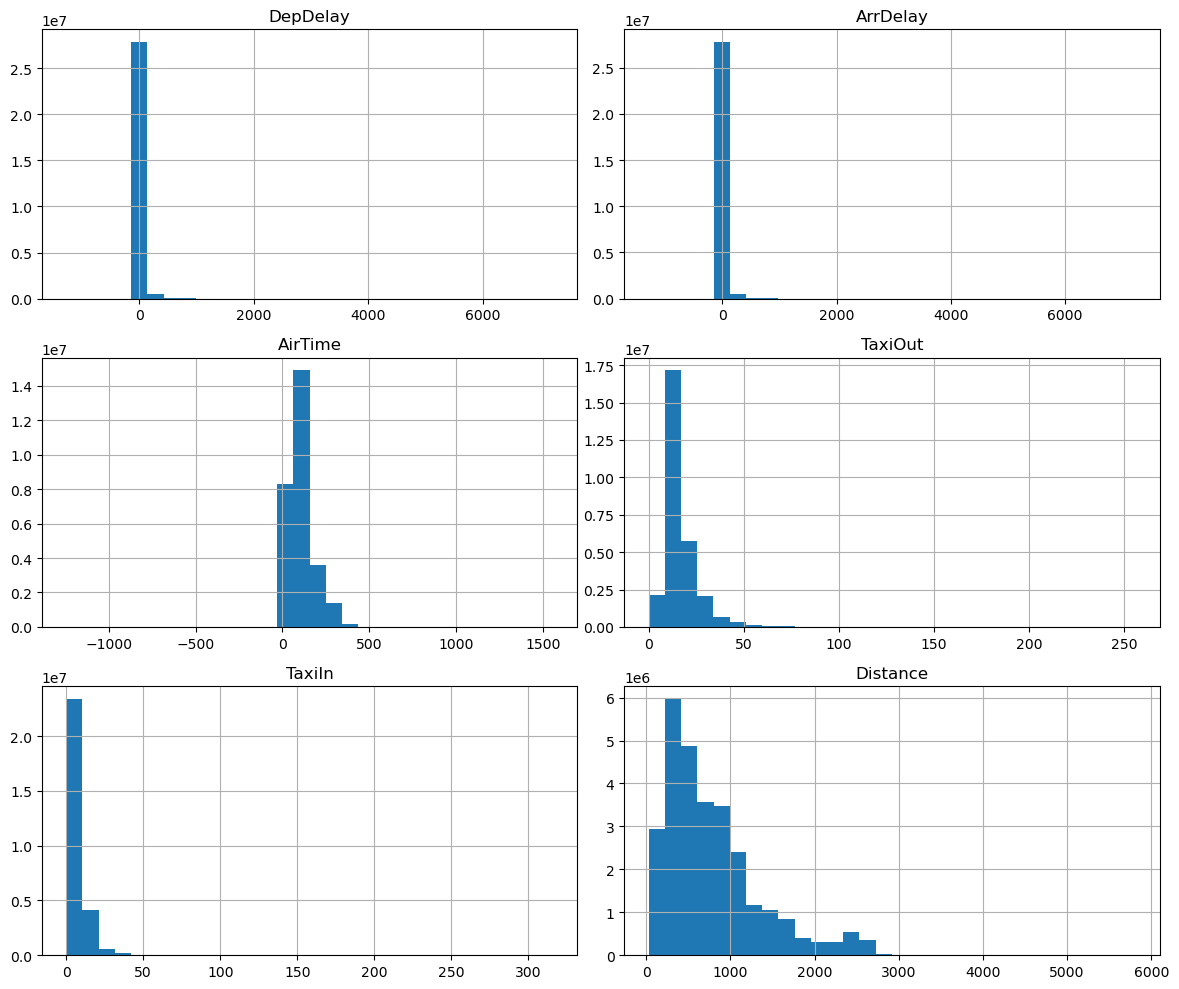

In [23]:
# Plotting histograms for key numerical columns
numerical_columns = ['DepDelay', 'ArrDelay', 'AirTime', 'TaxiOut', 'TaxiIn', 'Distance']

df_cleaned[numerical_columns].hist(bins=30, figsize=(12,10))
plt.tight_layout()
plt.show()

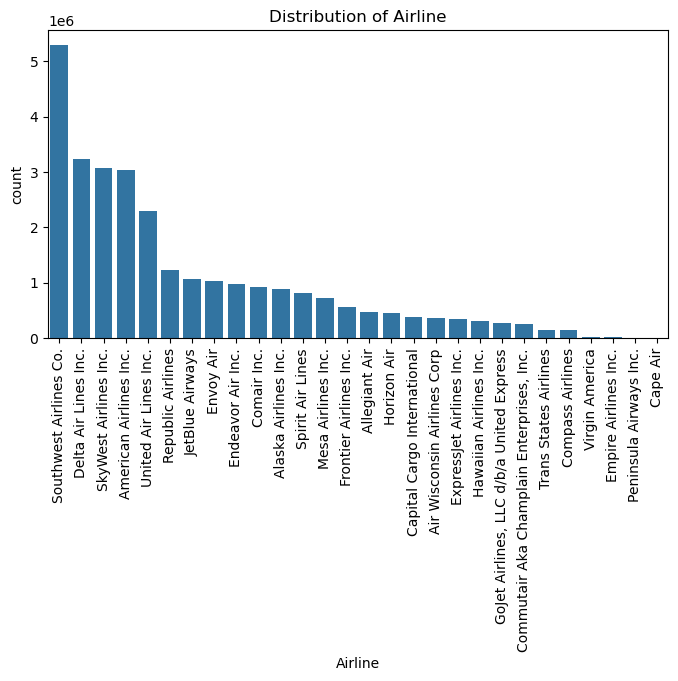

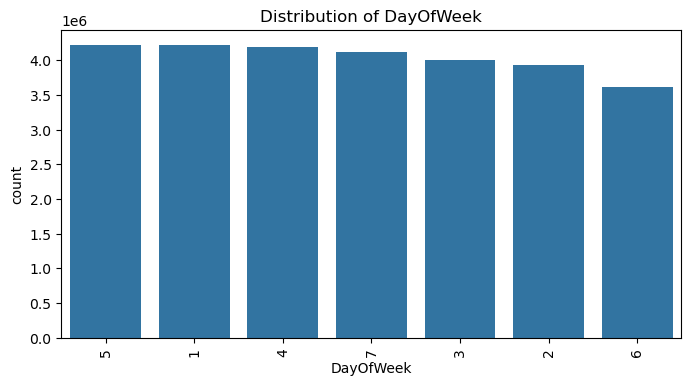

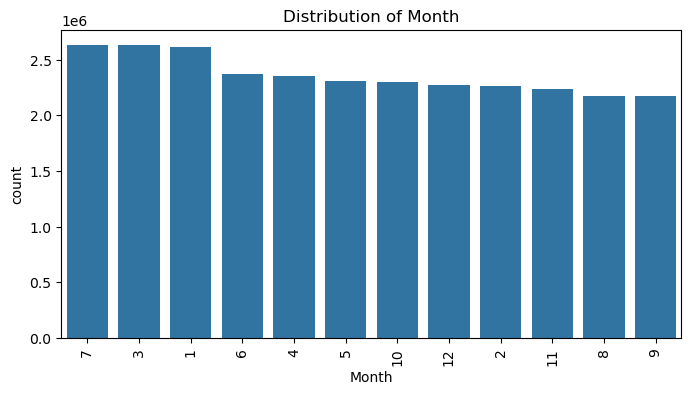

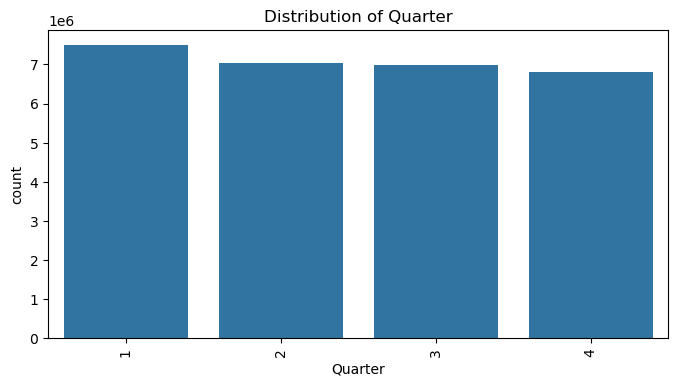

In [24]:
# Plotting bar plots for key categorical columns
categorical_columns = ['Airline', 'DayOfWeek', 'Month', 'Quarter']

for col in categorical_columns:
    plt.figure(figsize=(8,4))
    sns.countplot(x=col, data=df_cleaned, order=df_cleaned[col].value_counts().index)
    plt.xticks(rotation=90)
    plt.title(f'Distribution of {col}')
    plt.show()

From numerical plots, I saw negative values for DepDelay and ArrDelay which depicts early timings. Some values in Airtime are negative which seems wrong.

From categorical plots;  We have the counts maximum for southwest airlines in airline distribution, 5th day of week being the highest number of flights being used, followed by 7th month in month distribution and 1st quarter being the highest when flights were flown

In [26]:
# Check for rows with negative AirTime
negative_airtime = df_cleaned[df_cleaned['AirTime'] < 0]
print(negative_airtime.shape)

# Remove rows with negative AirTime
df_cleaned = df_cleaned[df_cleaned['AirTime'] >= 0]

(1, 28)


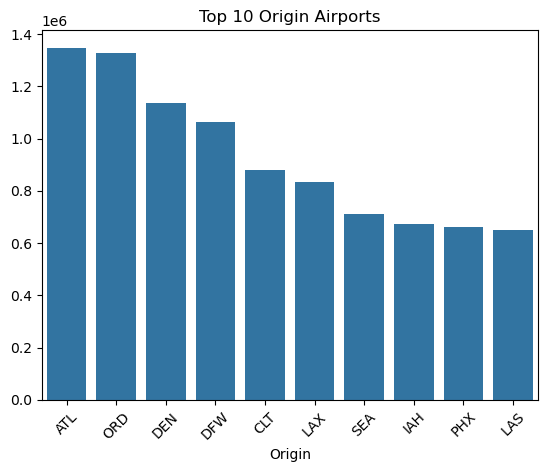

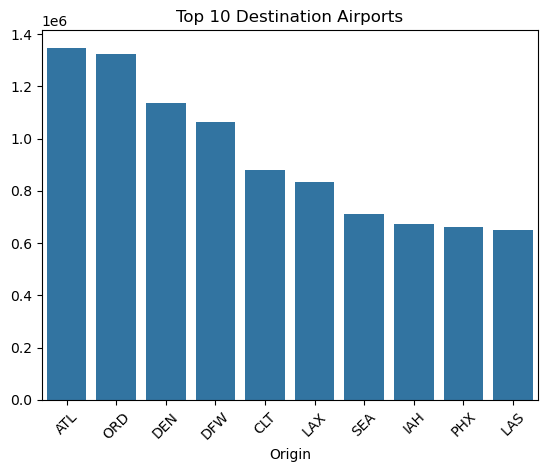

In [27]:
# Plot top 10 Origins
top_origins = df_cleaned['Origin'].value_counts().nlargest(10)
top_origins_airports = top_origins.index.astype(str)
sns.barplot(x=top_origins_airports, y=top_origins.values)
plt.xticks(rotation=45)
plt.title('Top 10 Origin Airports')
plt.show()

# Plot top 10 Destinations
top_destinations = df_cleaned['Dest'].value_counts().nlargest(10)
top_dest_airports = top_origins.index.astype(str)
sns.barplot(x=top_dest_airports, y=top_destinations.values)
plt.xticks(rotation=45)
plt.title('Top 10 Destination Airports')
plt.show()


## Bivariate Analysis

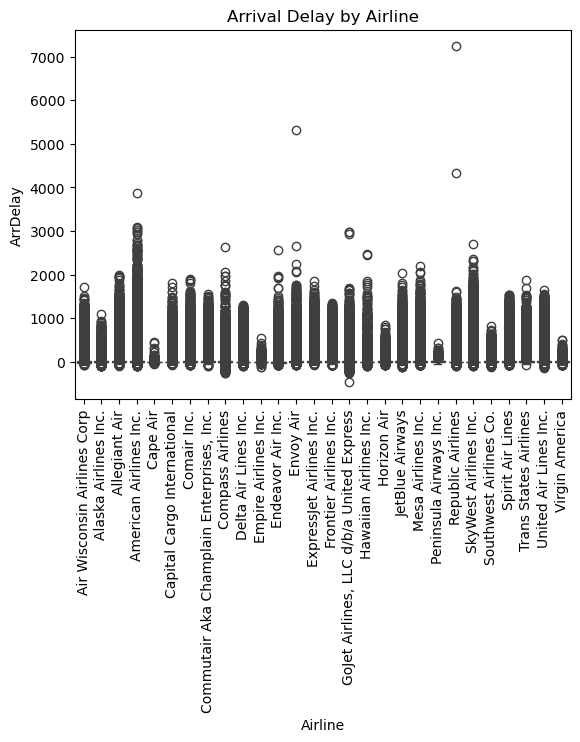

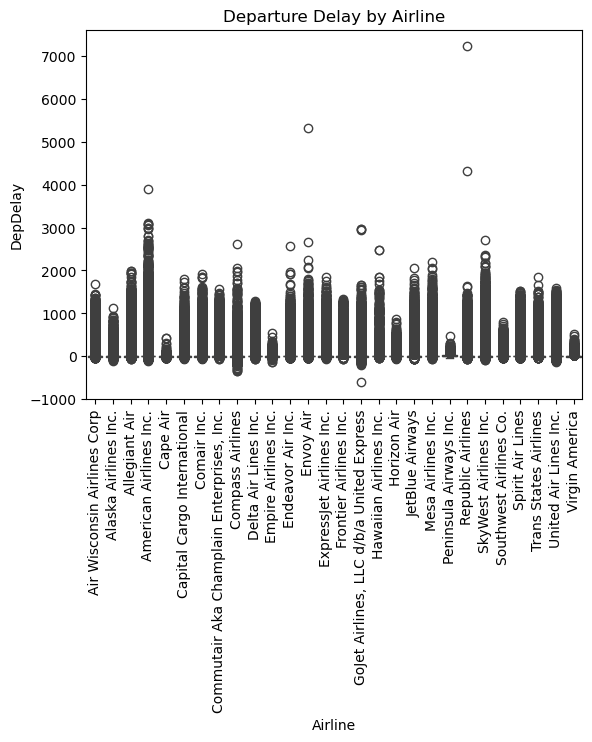

In [29]:
# Plot Arrival Delay by Airline
sns.boxplot(x='Airline', y='ArrDelay', data=df_cleaned)
plt.xticks(rotation=90)
plt.title('Arrival Delay by Airline')
plt.show()

# Plot Departure Delay by Airline
sns.boxplot(x='Airline', y='DepDelay', data=df_cleaned)
plt.xticks(rotation=90)
plt.title('Departure Delay by Airline')
plt.show()

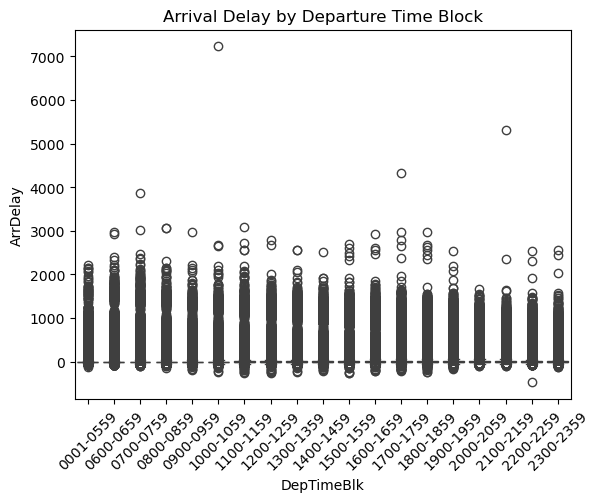

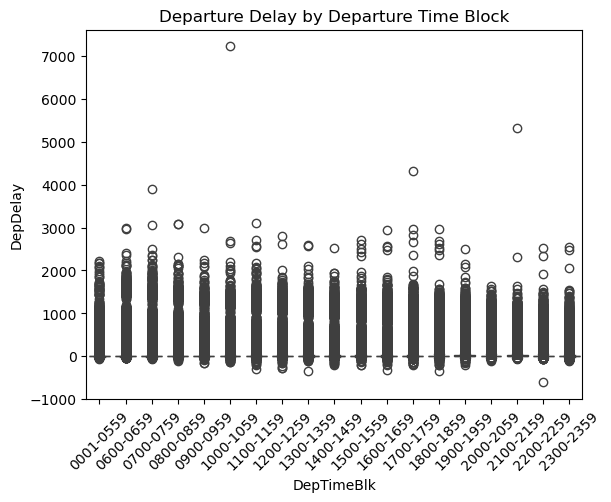

In [30]:
# Plot Arrival Delay by Departure Time Block
sns.boxplot(x='DepTimeBlk', y='ArrDelay', data=df_cleaned)
plt.xticks(rotation=45)
plt.title('Arrival Delay by Departure Time Block')
plt.show()

# Plot Departure Delay by Departure Time Block
sns.boxplot(x='DepTimeBlk', y='DepDelay', data=df_cleaned)
plt.xticks(rotation=45)
plt.title('Departure Delay by Departure Time Block')
plt.show()

American Airlines Inc has the highest arrival and departure delay while block 0700-0759 has highest arrival and departure delay

Correlation between Delay Factors:

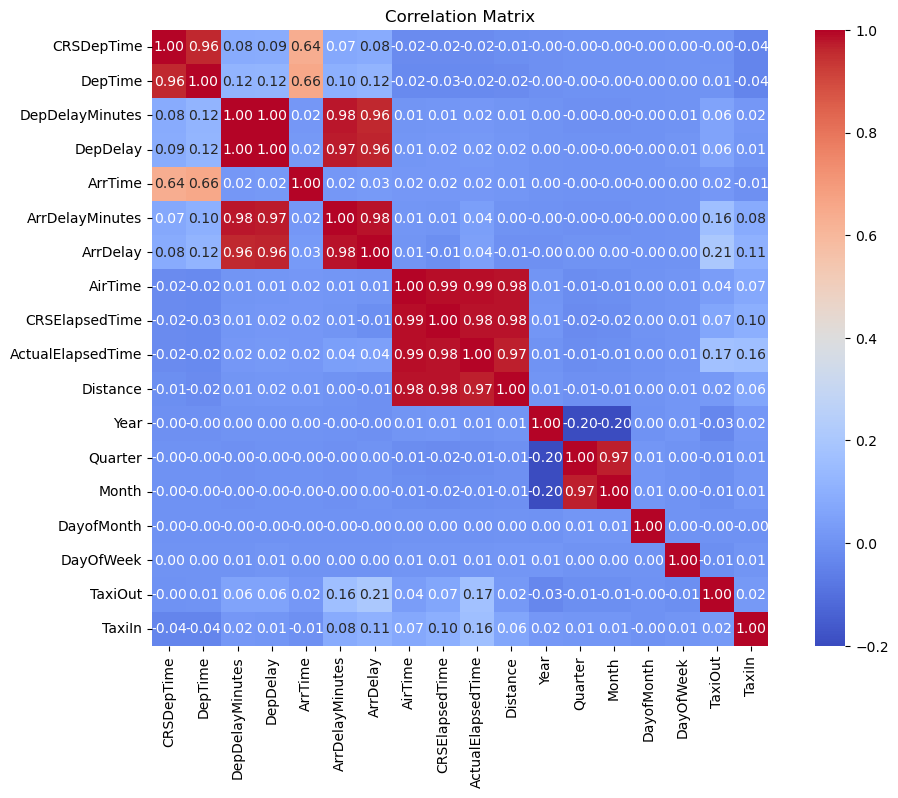

Major correlations for CRSDepTime:
DepTime    0.960444
ArrTime    0.636370
Name: CRSDepTime, dtype: float64


Major correlations for DepTime:
CRSDepTime    0.960444
ArrTime       0.657723
Name: DepTime, dtype: float64


Major correlations for DepDelayMinutes:
DepDelay           0.996938
ArrDelayMinutes    0.979044
ArrDelay           0.959789
Name: DepDelayMinutes, dtype: float64


Major correlations for DepDelay:
DepDelayMinutes    0.996938
ArrDelayMinutes    0.974782
ArrDelay           0.962516
Name: DepDelay, dtype: float64


Major correlations for ArrTime:
CRSDepTime    0.636370
DepTime       0.657723
Name: ArrTime, dtype: float64


Major correlations for ArrDelayMinutes:
DepDelayMinutes    0.979044
DepDelay           0.974782
ArrDelay           0.981622
Name: ArrDelayMinutes, dtype: float64


Major correlations for ArrDelay:
DepDelayMinutes    0.959789
DepDelay           0.962516
ArrDelayMinutes    0.981622
Name: ArrDelay, dtype: float64


Major correlations for AirTime:
CRSElapsed

In [33]:
plt.figure(figsize=(12, 8))
numeric_columns = df_cleaned.select_dtypes(include=[np.number])
correlation_matrix = numeric_columns.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

# Get major correlations
threshold = 0.5
major_corr = correlation_matrix[(correlation_matrix >= threshold) | (correlation_matrix <= -threshold)]

# Print the major correlations, excluding self-correlations (1.0)
for column in major_corr.columns:
    major_corr_pairs = major_corr[column][major_corr[column].abs() > threshold].drop(index=column)
    if not major_corr_pairs.empty:
        print(f"Major correlations for {column}:")
        print(major_corr_pairs)
        print("\n")

Key Insights:

Departure and Arrival Times:
CRSDepTime is highly correlated with DepTime (0.96) and ArrTime (0.64). This suggests that scheduled departure times have a strong relationship with actual departure times and arrival times.

Departure Delays:
DepDelayMinutes and DepDelay are nearly perfectly correlated (0.99), indicating they essentially represent the same information in different formats.
Both DepDelayMinutes and DepDelay are also strongly correlated with ArrDelayMinutes and ArrDelay. This shows that delays in departure often lead to delays in arrival.

Arrival Delays:
ArrDelay is closely linked to ArrDelayMinutes, indicating consistency in delay measurement. The correlation with DepDelay and DepDelayMinutes reinforces that departure delays affect arrival times.

Flight Duration:
AirTime is highly correlated with CRSElapsedTime (0.99) and ActualElapsedTime (0.99), indicating that these metrics are closely related and that variations in flight time will likely impact the actual elapsed time as well.

Distance:
There’s a strong correlation between Distance and AirTime (0.98), suggesting longer flights generally take more time.

Time of Year:
The Quarter is highly correlated with Month (0.97), which makes sense since each quarter is comprised of specific months.

## Analyzing Departure Delay vs. Arrival Delay

In [68]:
# Ensure 'DepDelay' is in the correct format
df_cleaned['DepDelay'] = df_cleaned['DepDelay'].astype('float32')

# Grouping departure delays into intervals of 15 minutes
delay_intervals = pd.cut(df_cleaned['DepDelay'], bins = range(0,360,15))

# Grouping by delay intervals and calculating summary statistics for arrival delays
delay_analysis = df_cleaned.groupby(delay_intervals)['ArrDelay'].agg(['mean', 'median', 'max']).reset_index()

delay_analysis

C:\Users\rinku\AppData\Local\Temp\ipykernel_23988\2722944618.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  delay_analysis = df_cleaned.groupby(delay_intervals)['ArrDelay'].agg(['mean', 'median', 'max']).reset_index()


,DepDelay,mean,median,max
0,"(0, 15]",0.743005,-1.0,510.0
1,"(15, 30]",16.679306,15.0,691.0
2,"(30, 45]",32.205826,30.0,460.0
3,"(45, 60]",47.594307,45.0,310.0
4,"(60, 75]",62.962868,61.0,515.0
5,"(75, 90]",78.315887,76.0,354.0
6,"(90, 105]",93.714294,91.0,348.0
7,"(105, 120]",109.012939,106.0,381.0
8,"(120, 135]",124.183472,122.0,452.0
9,"(135, 150]",139.273666,137.0,470.0


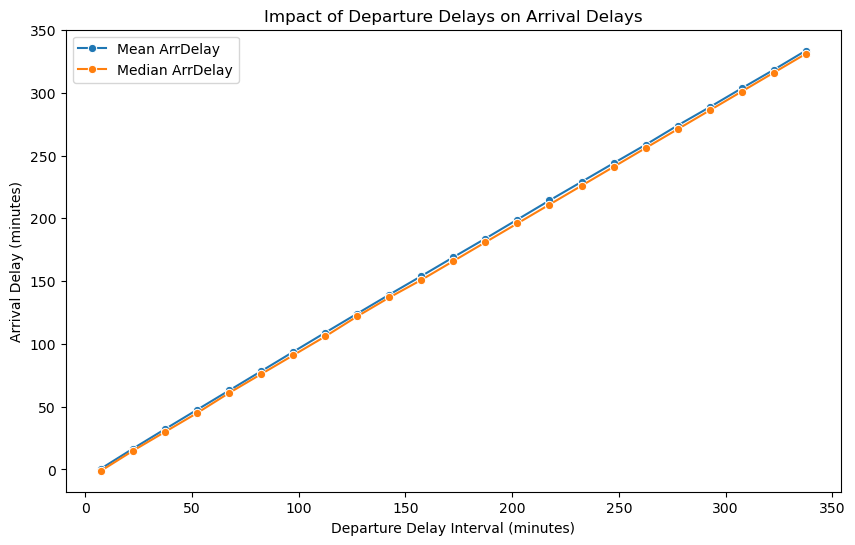

In [70]:
# Convert the bins into numeric values by taking the midpoint of each bin
delay_analysis['DepDelay_mid'] = delay_analysis['DepDelay'].apply(lambda x: x.mid)


# Plotting the mean and median arrival delays for each departure delay interval
plt.figure(figsize=(10, 6))
sns.lineplot(x=delay_analysis['DepDelay_mid'], y=delay_analysis['mean'], label='Mean ArrDelay', marker='o')
sns.lineplot(x=delay_analysis['DepDelay_mid'], y=delay_analysis['median'], label='Median ArrDelay', marker='o')

plt.title('Impact of Departure Delays on Arrival Delays')
plt.xlabel('Departure Delay Interval (minutes)')
plt.ylabel('Arrival Delay (minutes)')
plt.legend()
plt.show()

The fact that both the mean and median lines closely overlap indicates that the distribution of arrival delays follows a consistent pattern across different departure delay intervals, without extreme outliers skewing the results.

In [75]:
# Define outliers where ArrDelay is significantly higher than DepDelay (e.g., more than 2x)
outliers_high_arrival_delay = df_cleaned[(df_cleaned['ArrDelay'] > 2 * df_cleaned['DepDelay']) & (df_cleaned['DepDelay'] > 0)]

# Define flights where DepDelay is significant but flight arrived early
early_arrivals = df_cleaned[(df_cleaned['DepDelay'] > 0) & (df_cleaned['ArrDelay'] < 0)]

# Count and display some examples of the outliers
print("Outliers - High Arrival Delay despite low Departure Delay:")
print(outliers_high_arrival_delay[['DepDelay', 'ArrDelay']].head())

print("\nFlights with Significant Departure Delay but Early Arrival:")
print(early_arrivals[['DepDelay', 'ArrDelay']].head())

Outliers - High Arrival Delay despite low Departure Delay:
     DepDelay  ArrDelay
102       6.0      15.0
108       1.0      27.0
112       6.0      16.0
203       2.0       9.0
240       1.0       3.0

Flights with Significant Departure Delay but Early Arrival:
    DepDelay  ArrDelay
6        2.0      -1.0
34      15.0      -2.0
74      14.0      -4.0
80       3.0      -2.0
81      29.0      -5.0


C:\Users\rinku\AppData\Local\Temp\ipykernel_23988\3085441236.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  time_block_analysis = df_cleaned.groupby('DepTimeBlk')['ArrDelay'].agg(['mean', 'median', 'count']).reset_index()


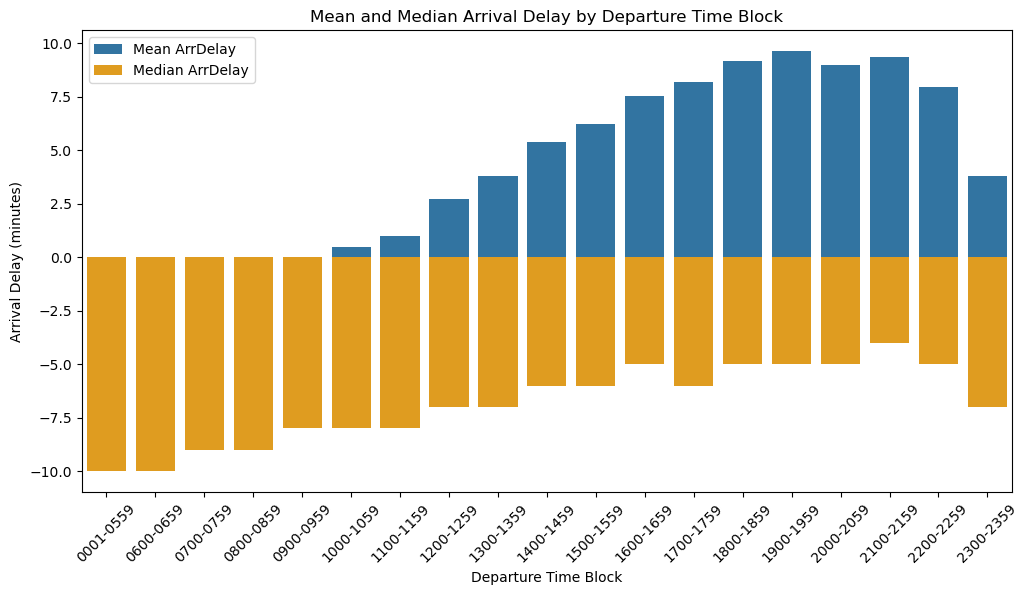

In [77]:
# Analyzing the mean and median delay for different time blocks (CRSDepTime)
time_block_analysis = df_cleaned.groupby('DepTimeBlk')['ArrDelay'].agg(['mean', 'median', 'count']).reset_index()

# Plotting the analysis
plt.figure(figsize=(12, 6))
sns.barplot(x='DepTimeBlk', y='mean', data=time_block_analysis, label='Mean ArrDelay')
sns.barplot(x='DepTimeBlk', y='median', data=time_block_analysis, label='Median ArrDelay', color='orange')

plt.title('Mean and Median Arrival Delay by Departure Time Block')
plt.xlabel('Departure Time Block')
plt.ylabel('Arrival Delay (minutes)')
plt.xticks(rotation=45)
plt.legend()
plt.show()

Early Morning Flights (0001-0859):

Both the mean and median arrival delays are negative in this range, indicating that flights during this time tend to arrive earlier than scheduled.

Late Morning to Afternoon (0900-1559):

Arrival delays increase steadily from 1000-1259 onwards. Both the mean and median arrival delays are positive, indicating increasing likelihood of flights arriving late.
The peak delay happens between 1200-1559, where the mean arrival delay is the highest (around 8-10 minutes), showing that flights during this period are more prone to delays.

Afternoon and Early Evening Flights (1600-1859):

The peak of the delays is 1800-1859. Both the mean and median delays are close to 10 minutes, making this the time block with the highest average delays.

Late Evening Flights (1900-2359):

After the peak at 1800-1859, the delays gradually decrease in the late evening hours. The mean and median arrival delays drop, with a substantial reduction seen after 2200-2259, and delays become negative by 2300-2359, indicating flights are arriving earlier than expected.

## Distance and AirTime Impact Analysis

C:\Users\rinku\AppData\Local\Temp\ipykernel_23988\667159906.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  distance_delay = df_cleaned.groupby('DistanceCategory')['ArrDelay'].agg(['mean', 'median', 'count', 'std']).reset_index()


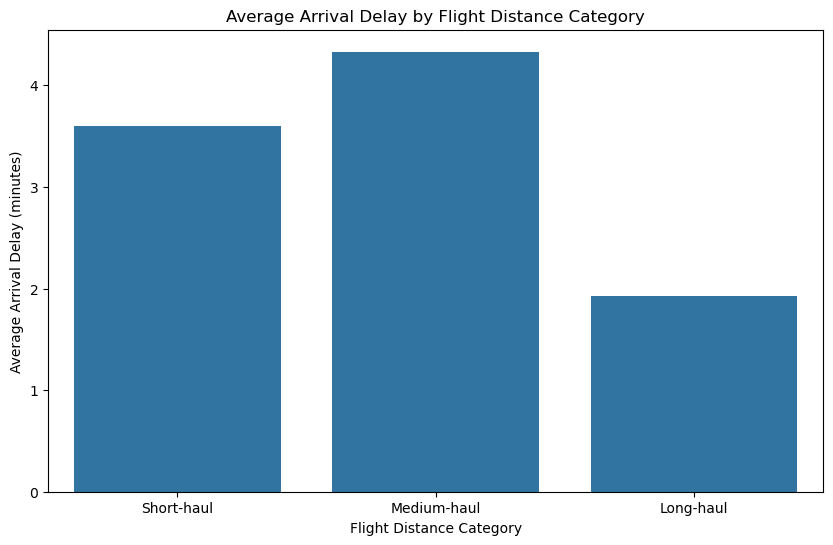

Text(0.5, 0.98, 'AirTime vs Arrival Delay by Distance Category')

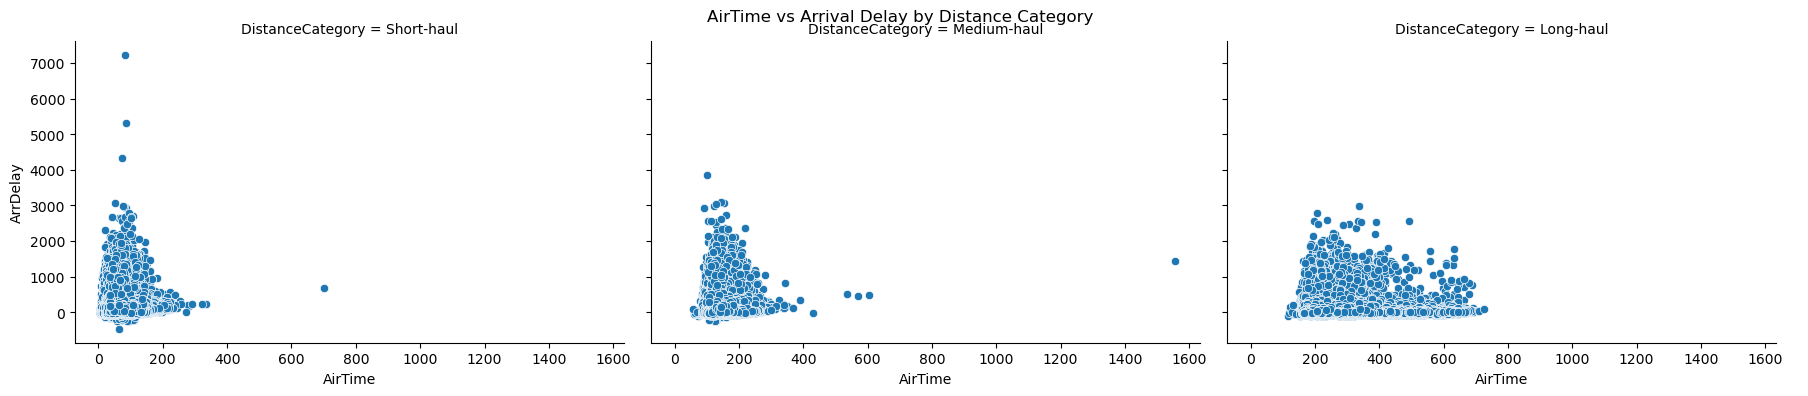

In [86]:
df_cleaned['Distance'] = df_cleaned['Distance'].astype('float32')
# Define distance categories
bins = [0, 800, 1500, float('inf')]
labels = ['Short-haul', 'Medium-haul', 'Long-haul']
df_cleaned['DistanceCategory'] = pd.cut(df_cleaned['Distance'], bins=bins, labels=labels)

# Group by Distance Category and calculate mean delay
distance_delay = df_cleaned.groupby('DistanceCategory')['ArrDelay'].agg(['mean', 'median', 'count', 'std']).reset_index()

# Plotting average delay by distance category
plt.figure(figsize=(10, 6))
sns.barplot(x='DistanceCategory', y='mean', data=distance_delay)
plt.title('Average Arrival Delay by Flight Distance Category')
plt.ylabel('Average Arrival Delay (minutes)')
plt.xlabel('Flight Distance Category')
plt.show()

# Analyzing AirTime vs ArrDelay
g = sns.FacetGrid(df_cleaned, col='DistanceCategory', height=4, aspect=1.5)
g.map(sns.scatterplot, 'AirTime', 'ArrDelay')
g.add_legend()
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('AirTime vs Arrival Delay by Distance Category')

Bar Chart Analysis: Average Arrival Delay by Flight Distance Category

Short-haul flights show the highest average arrival delay, which is interesting as one might expect shorter flights to have fewer delays due to less complexity in managing shorter routes.

Medium-haul flights have slightly lower delays than short-haul, suggesting better efficiency or less susceptibility to factors that typically delay flights.

Long-haul flights show the least average arrival delay, which could indicate that airlines prioritize on-time performance for longer routes or that there's more buffer time built into long-haul schedules to absorb delays.

Scatter Plots Analysis: AirTime vs Arrival Delay by Distance Category

Short-haul flights: The scatter plot shows a cluster of delays mainly in the lower range of airtime, with a few outliers showing very high delays relative to the airtime.

Medium-haul flights: Similar to short-haul, the plot displays a dense cluster in the lower range of airtime. It shows fewer outliers compared to short-haul flights, suggesting more consistency in delay patterns.

Long-haul flights: The plot shows a broader spread in airtime, reflecting the variability in long-haul flight durations. The delay pattern here is more consistent, with fewer extreme outliers, supporting the bar chart findings that long-haul flights have lower average delays.

C:\Users\rinku\AppData\Local\Temp\ipykernel_23988\2254248544.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  airport_delays = df_cleaned[df_cleaned['DistanceCategory'] == 'Short-haul'].groupby('Origin')['ArrDelay'].agg(['mean', 'count']).reset_index().sort_values(by='mean', ascending=False)


Top 5 Airports with Highest Average Delays for Short-Haul Flights:
    Origin       mean  count
244    MMH  23.097170   1060
171    HYA  21.435616    365
65     CDB  20.937500    240
39     BIH  20.643356    286
290    PQI  19.016016   2123


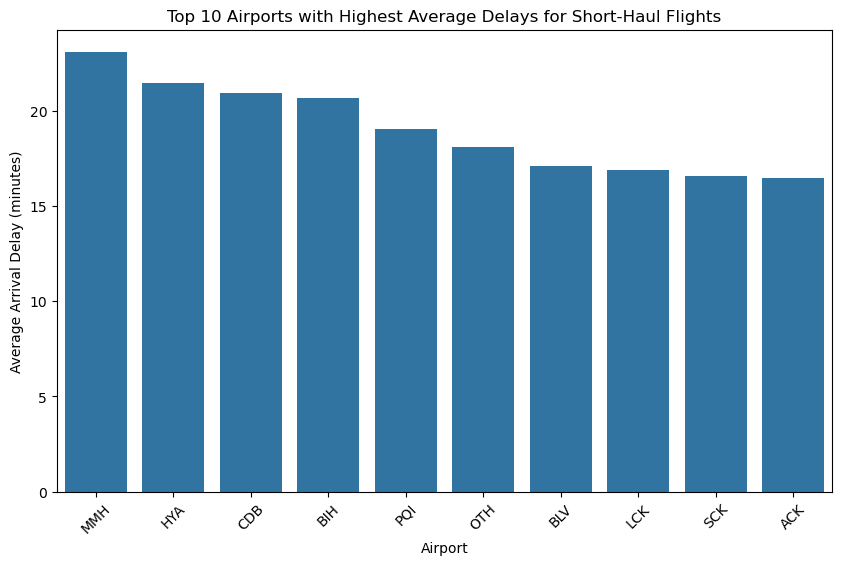

C:\Users\rinku\AppData\Local\Temp\ipykernel_23988\2254248544.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  time_of_day_delays = df_cleaned[df_cleaned['DistanceCategory'] == 'Short-haul'].groupby('DepTimeBlk')['ArrDelay'].mean().reset_index()


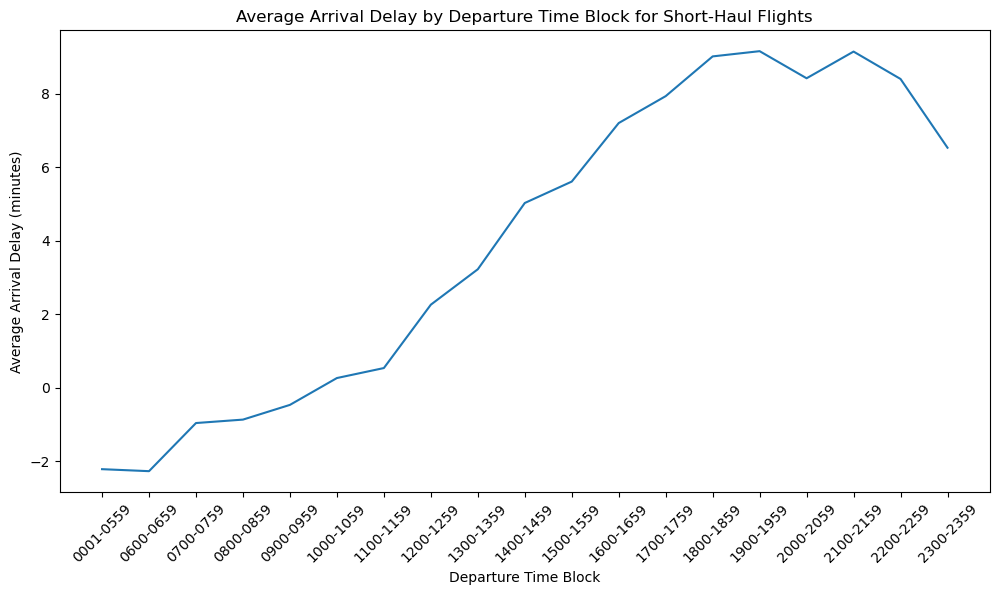

In [94]:
# Group data by origin airport and calculate average delays
airport_delays = df_cleaned[df_cleaned['DistanceCategory'] == 'Short-haul'].groupby('Origin')['ArrDelay'].agg(['mean', 'count']).reset_index().sort_values(by='mean', ascending=False)

# Display top 5 airports with the highest average delays
print("Top 5 Airports with Highest Average Delays for Short-Haul Flights:")
print(airport_delays.head())

airport_delays['Origin'] = airport_delays['Origin'].astype(str)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Origin', y='mean', data=airport_delays.head(10))
plt.title('Top 10 Airports with Highest Average Delays for Short-Haul Flights')
plt.xlabel('Airport')
plt.ylabel('Average Arrival Delay (minutes)')
plt.xticks(rotation=45)
plt.show()

# Analyzing Time of Day
time_of_day_delays = df_cleaned[df_cleaned['DistanceCategory'] == 'Short-haul'].groupby('DepTimeBlk')['ArrDelay'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=time_of_day_delays, x='DepTimeBlk', y='ArrDelay')
plt.title('Average Arrival Delay by Departure Time Block for Short-Haul Flights')
plt.xlabel('Departure Time Block')
plt.ylabel('Average Arrival Delay (minutes)')
plt.xticks(rotation=45)
plt.show()


## CRSDepTime vs DepTime Analysis

0    1157.0
1    1157.0
2    1153.0
3    1150.0
4    1355.0
Name: DepTime, dtype: float16


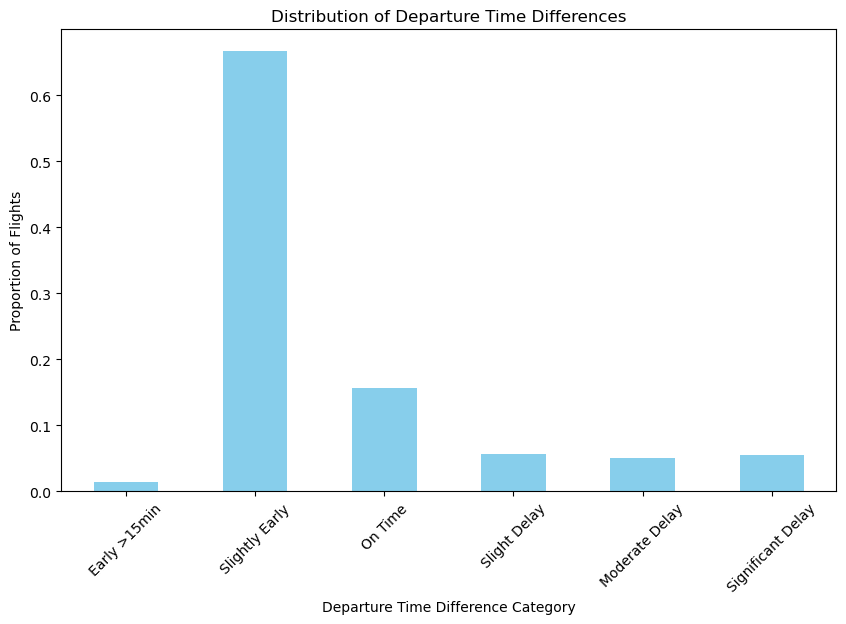

In [103]:
# Function to convert HHMM to minutes
def hhmm_to_minutes(time):
    return (time // 100) * 60 + (time % 100)

# Apply conversion to CRSDepTime and DepTime
df_cleaned['CRSDepTimeMin'] = df_cleaned['CRSDepTime'].apply(hhmm_to_minutes)
df_cleaned['DepTimeMin'] = df_cleaned['DepTime'].apply(hhmm_to_minutes)

# Calculate the difference in minutes
df_cleaned['DepDelayCalc'] = df_cleaned['DepTimeMin'] - df_cleaned['CRSDepTimeMin']

# Categorize the differences into bins
bins = [-float('inf'), -15, 0, 15, 30, 60, float('inf')]
labels = ['Early >15min', 'Slightly Early', 'On Time', 'Slight Delay', 'Moderate Delay', 'Significant Delay']
df_cleaned['DepartureDiffCategory'] = pd.cut(df_cleaned['DepDelayCalc'], bins=bins, labels=labels)

# Group by DepartureDiffCategory and analyze
departure_diff_stats = df_cleaned['DepartureDiffCategory'].value_counts(normalize=True).sort_index()

# Plotting
plt.figure(figsize=(10, 6))
departure_diff_stats.plot(kind='bar', color='skyblue')
plt.title('Distribution of Departure Time Differences')
plt.xlabel('Departure Time Difference Category')
plt.ylabel('Proportion of Flights')
plt.xticks(rotation=45)
plt.show()

Predominantly Early or Slightly Early: A significant portion of flights depart earlier than scheduled. The largest category is "Early >15min," which indicates that a substantial number of flights leave well ahead of their scheduled departure time. This is somewhat unusual and could reflect conservative scheduling practices, where airlines allocate more time than needed, potentially to buffer against possible delays later in the day.

On-Time and Delays: The "On Time" category has a smaller proportion, suggesting that strict on-time departures are less common. Slight, moderate, and significant delays occur but are notably less frequent compared to early departures.

Insights:

Operational Efficiency or Conservative Scheduling: The high frequency of early departures could indicate efficient operations or possibly that departure times are set conservatively to allow for early departures. This might help manage passenger expectations and provide leeway for handling any unforeseen delays en route.

Customer Experience and Planning: For passengers, such early departures could lead to satisfaction if they result in early arrivals but might cause inconvenience if passengers are not at the gate in time, thinking they have more time before their flight departs.

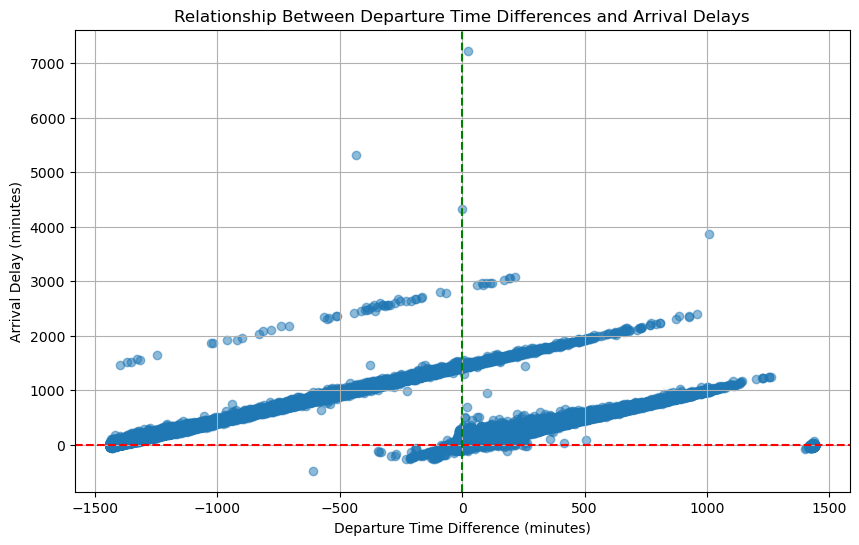

Correlation between departure time differences and arrival delays: 0.12755046932701108


In [109]:
# Plotting to visualize the relationship between departure differences and arrival delays
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned['DepDelayCalc'], df_cleaned['ArrDelay'], alpha=0.5)
plt.title('Relationship Between Departure Time Differences and Arrival Delays')
plt.xlabel('Departure Time Difference (minutes)')
plt.ylabel('Arrival Delay (minutes)')
plt.axhline(0, color='red', linestyle='--')  # Line for no arrival delay
plt.axvline(0, color='green', linestyle='--')  # Line for on-time departures
plt.grid(True)
plt.show()

# Calculate correlation coefficient
correlation = df_cleaned['DepDelayCalc'].corr(df_cleaned['ArrDelay'])
print(f"Correlation between departure time differences and arrival delays: {correlation}")

Observations:
Positive Correlation: The plot shows a moderate positive correlation (0.1275) between departure time differences and arrival delays. This suggests that, generally, flights that depart later than scheduled tend to also arrive later than scheduled.

Trend Lines: There are visible upward trends across different clusters of data points. As the departure time difference increases (both early and late departures), the arrival delays tend to increase as well.

Variability: There's significant variability in arrival delays, especially with large early or late departures. This variability indicates that other factors, possibly including route, weather conditions, and air traffic, also significantly influence arrival times.

Extreme Values: There are some extreme values where flights have exceptionally high arrival delays relative to their departure time differences. These outliers may represent specific scenarios where flights were significantly affected by extraordinary circumstances.

Insights:

Departure Delays Impact Arrivals: This confirms that managing departure times more effectively could influence arrival punctuality. However, the moderate correlation coefficient suggests that while there's a relationship, it's not exceptionally strong, and other factors play substantial roles in determining arrival times.

Operational Efficiency: Improving operational efficiency at departure could help mitigate some of the arrival delays, but due to the high variability, it's clear that airlines and airports also need robust strategies for handling delays en route and preparing for quick recoveries from setbacks.

In [115]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28339596 entries, 0 to 29193779
Data columns (total 33 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   FlightDate             datetime64[us]
 1   Airline                category      
 2   Origin                 category      
 3   Dest                   category      
 4   Cancelled              bool          
 5   Diverted               bool          
 6   CRSDepTime             int16         
 7   DepTime                float16       
 8   DepDelayMinutes        float16       
 9   DepDelay               float32       
 10  DepDel15               bool          
 11  ArrTime                float16       
 12  ArrDelayMinutes        float16       
 13  ArrDelay               float16       
 14  ArrDel15               bool          
 15  AirTime                float16       
 16  CRSElapsedTime         float16       
 17  ActualElapsedTime      float16       
 18  Distance               fl

In [121]:
df_cleaned.to_parquet('cleaned_data_airlines.parquet', index=False)

When loading the data for modeling, we realized some of the data has been corrupted. The reason being, to_parquet doesn't support float16. 

In the next steps, We will convert float16 datatypes to int16 for better support and efficiency. We can also convert other float columns to int16 as well as they do not contain decimal value other than 0.

In [ ]:
columns_to_convert1 = ['DepTime','DepDelayMinutes']
columns_to_convert2 = ['DepDelay','ArrTime']
columns_to_convert3 = ['ArrDelayMinutes','ArrDelay']
columns_to_convert4 = ['AirTime','CRSElapsedTime']
columns_to_convert5 = ['ActualElapsedTime','Distance']
columns_to_convert6 = ['TaxiOut','TaxiIn']
columns_to_convert7 = ['CRSDepTimeMin','DepTimeMin','DepDelayCalc']
cat_col = ['Year','Quarter','Month','DayofMonth','DayOfWeek']

for c in cat_col:
    df[c] = df[c].astype("category")
    
for c in columns_to_convert1:
    df_cleaned[c] = df_cleaned[c].astype("int16")

for c in columns_to_convert2:
    df_cleaned[c] = df_cleaned[c].astype("int16")

for c in columns_to_convert3:
    df_cleaned[c] = df_cleaned[c].astype("int16")

for c in columns_to_convert4:
    df_cleaned[c] = df_cleaned[c].astype("int16")

for c in columns_to_convert5:
    df_cleaned[c] = df_cleaned[c].astype("int16")

for c in columns_to_convert6:
    df_cleaned[c] = df_cleaned[c].astype("int16")

for c in columns_to_convert7:
    df_cleaned[c] = df_cleaned[c].astype("int16")
    

df_cleaned.info()

In [ ]:
df.to_parquet('dataset/fixed_cat_cleaned_data_airlines.parquet', index=False)